In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
leads=pd.read_csv("Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
percent_null = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percent_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [11]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [12]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [14]:
leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

In [15]:
percent_null = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percent_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [16]:
leads = leads.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

In [17]:
percent_null = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percent_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [18]:
for col in leads:
    print('*************************')
    print(col)
    print('*************************')
    print(leads[col].astype('category').value_counts())

*************************
Prospect ID
*************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
*************************
Lead Number
*************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
*************************
Lead Origin
*************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import               

In [19]:
leads.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [20]:
leads.drop(['Country'], axis = 1, inplace = True)

In [21]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [22]:
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [23]:
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
percent_null = round(100*(leads.isnull().sum()/len(leads.index)), 2)
print(percent_null)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [25]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [26]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [27]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [28]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [29]:
for col in leads:
    print('*************************')
    print(col)
    print('*************************')
    print(leads[col].astype('category').value_counts())

*************************
Prospect ID
*************************
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
*************************
Lead Number
*************************
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
*************************
Lead Origin
*************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import               

In [30]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [31]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [32]:
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]
leads = leads[~pd.isnull(leads['Last Activity'])]

In [33]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns

In [35]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


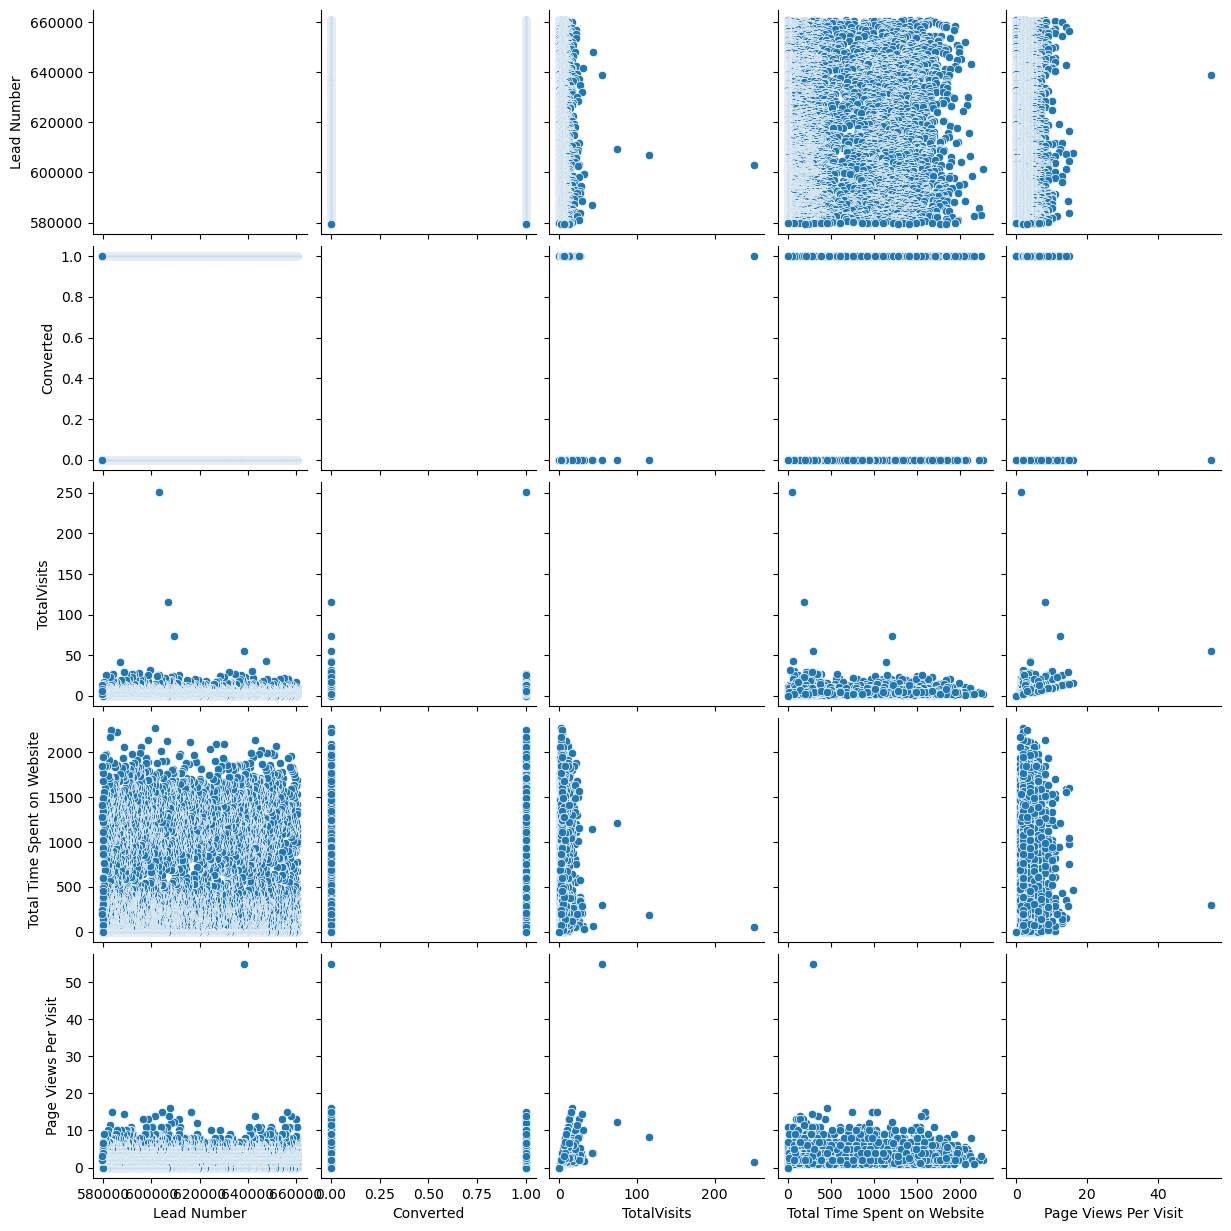

In [36]:
sns.pairplot(leads,diag_kind='ygr')
plt.show()

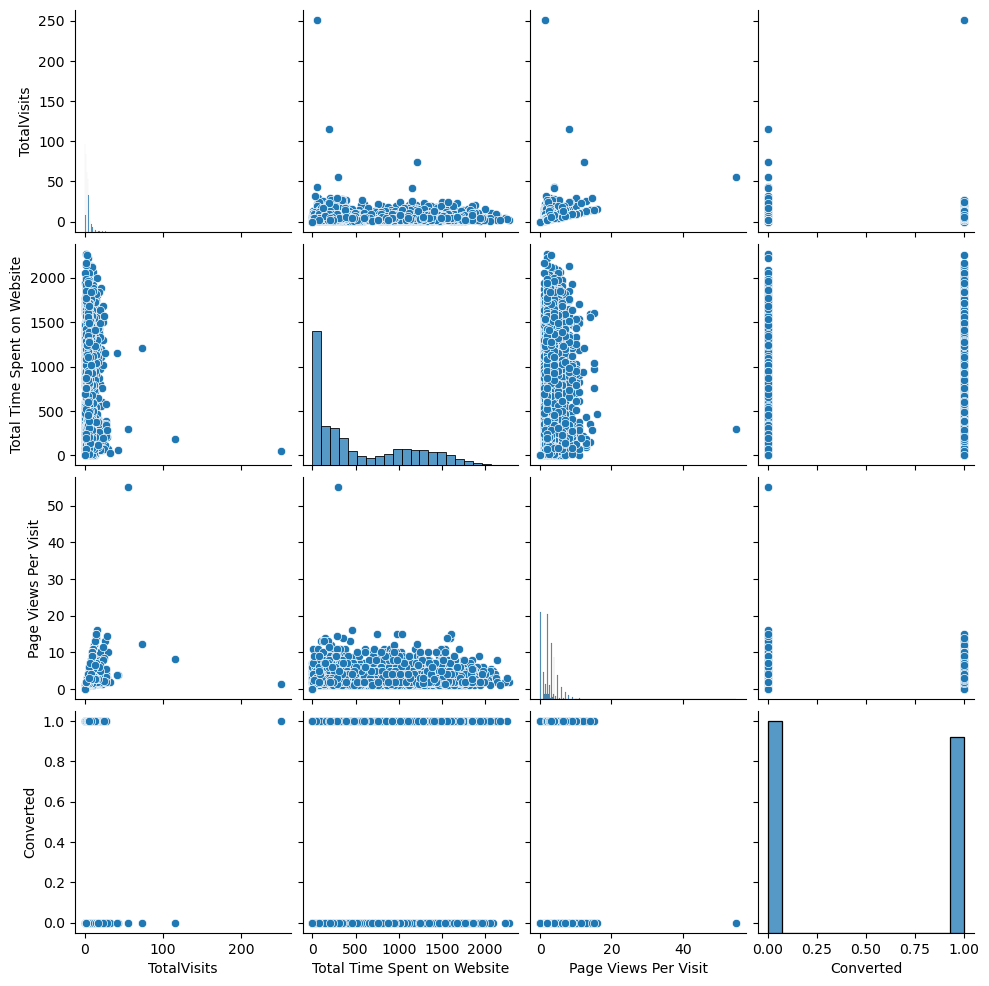

In [37]:
df = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(df,diag_kind='hist')
plt.show()

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df1 = pd.DataFrame(pt.fit_transform(df))
df1.columns = df.columns
df1.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.530955,-1.525638,-1.526354,-0.963591
1,0.697556,0.647748,0.239403,-0.963591
2,-0.210545,1.262992,-0.009806,1.037785
3,-0.714248,0.162637,-0.619990,-0.963591
4,-0.210545,1.205223,-0.619990,1.037785


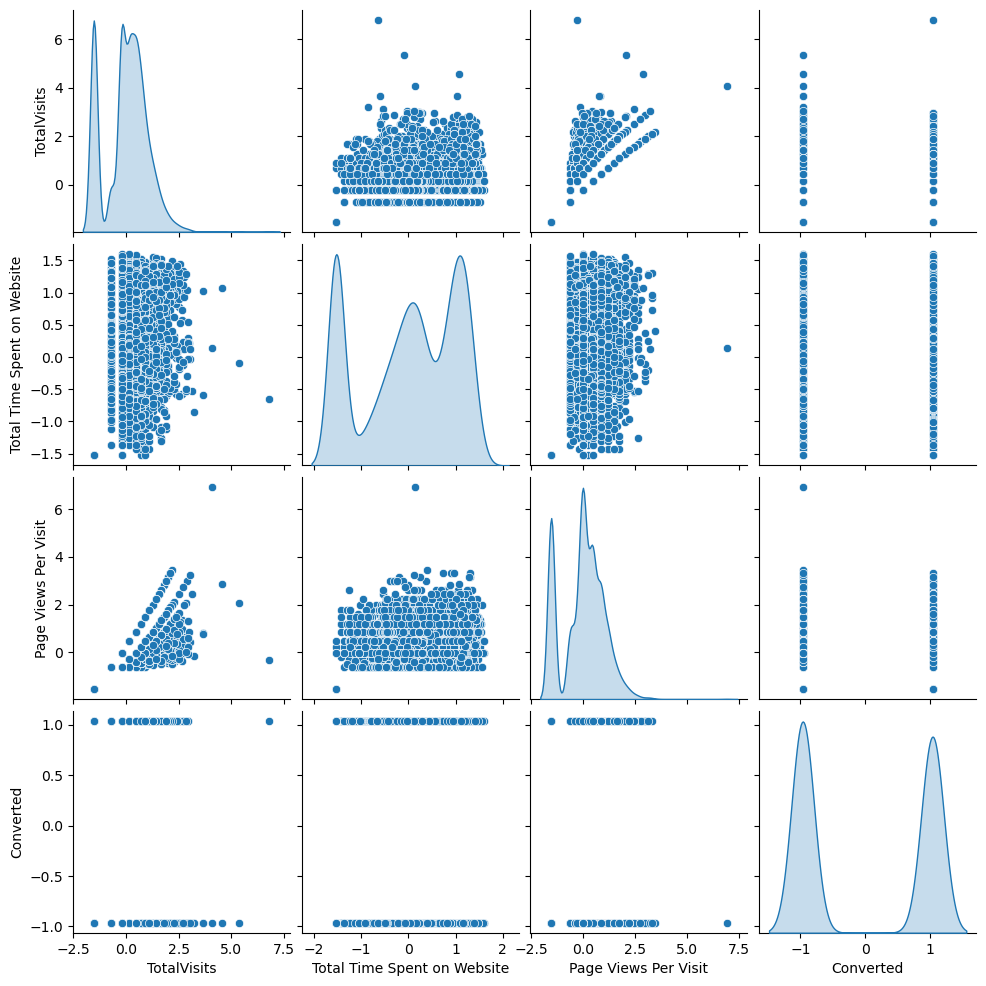

In [39]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

In [40]:
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [41]:
dummyvar = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

In [42]:
leads = pd.concat([leads, dummyvar], axis=1)

In [43]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,1,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,1,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,1,0,0,0,0,0,0


In [44]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [82]:
leads = leads.drop(['Prospect ID'], 1)

In [83]:
leads.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = leads.drop(['Converted'], 1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [86]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,Prospect ID,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6630,9acf78ad-a77d-4181-a875-1248fcc2a08a,598930,0.047619,0.084332,0.133333,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
8176,b3f4f976-a4ed-4862-83e9-30b4bd3c740a,587409,0.047619,0.154461,0.066667,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4978,820e6580-ab85-43a8-a72d-af29cefad8c0,612152,0.095238,0.498447,0.266667,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7457,c190b950-7afe-4191-8bc4-9f8a648ce8a2,592406,0.119048,0.085664,0.333333,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4383,f7cead75-e02f-4fa3-b16e-553380484286,617738,0.142857,0.234798,0.400000,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


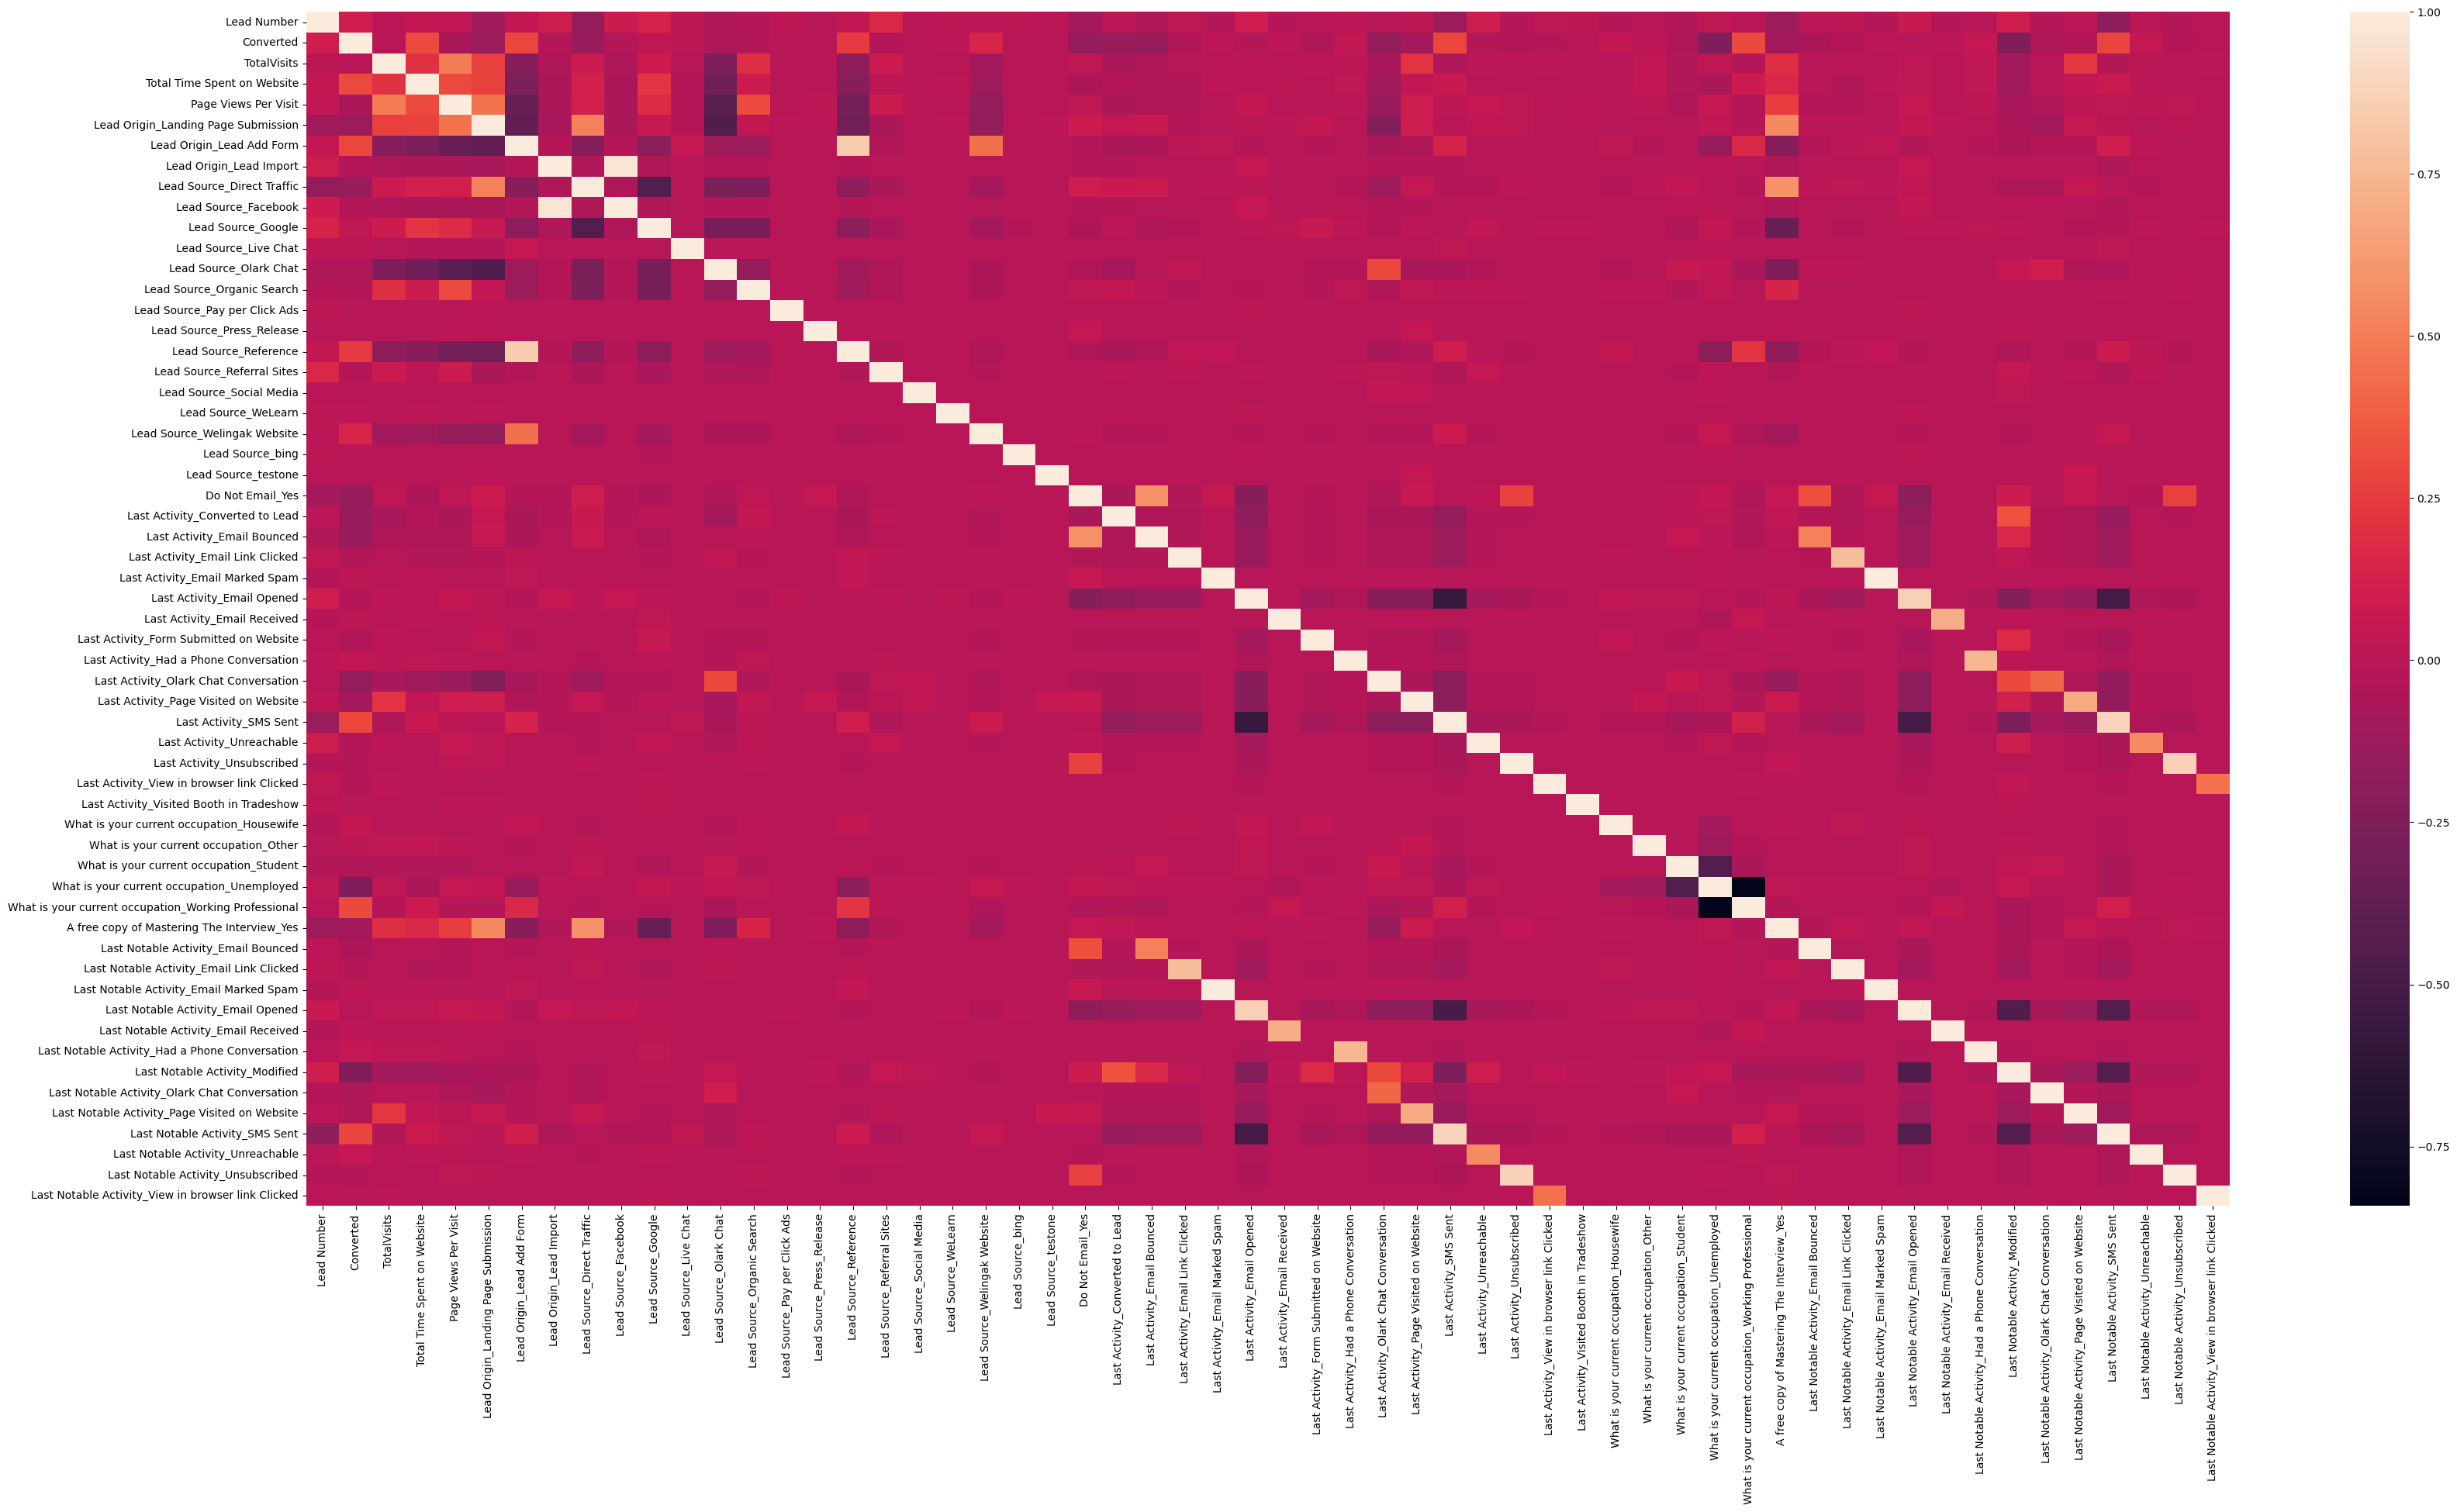

In [89]:
plt.figure(figsize = (40,20))
sns.heatmap(leads.corr())
plt.show()

In [90]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(lgr, step = 15)
rfe = RFE(estimator = lgr, step=15)
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 3),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 3),
 ('Lead Source_testone', False, 3),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email L

In [96]:
col = X_train.columns[rfe.support_]

In [98]:
X_train = X_train[col]

In [99]:
import statsmodels.api as sm

In [100]:
X_train_summary = sm.add_constant(X_train)
logmodel2 = sm.GLM(y_train, X_train_summary, family = sm.families.Binomial())
res = logmodel2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4465
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1963.3
Date:                Sun, 05 Mar 2023   Deviance:                       3926.6
Time:                        20:16:25   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -10.1660      1.259     -8.072      0.000     -12.634      -7.698
Lead Number                                            1.52e-05   1.82e-06      8.333      0.000    1.16e-05    1.88e-05
TotalVisits                                              0.0874      0.015      5.668      0.000       0.057       0.118
Total Time Spent on Website                              0.0020   8.47e-05     23.536      0.000       0.002       0.002
Page Views Per Visit                                    -0.1277      0.029     -4.335      0.000      -0.185      -0.070
Lead Origin_Landing Page Submission                     -0.0906      0.120     -0.754      0.451      -0.326       0.145
Lead Origin_Lead Add Form                                3.5948      0.778      4.618      0.000       2.069       5.120
Lead Source_Direct Traffic                               0.0753      0.313      0.240      0.810      -0.539       0.690
Lead Source_Google                                       0.4321      0.298      1.450      0.147      -0.152       1.016
Lead Source_Olark Chat                                   1.6712      0.316      5.284      0.000       1.051       2.291
Lead Source_Organic Search                               0.2587      0.311      0.832      0.406      -0.351       0.868
Lead Source_Reference                                    0.4735      0.838      0.565      0.572      -1.169       2.116
Lead Source_Welingak Website                             2.7338      1.289      2.121      0.034       0.208       5.260
Do Not Email_Yes                                        -1.3731      0.226     -6.082      0.000      -1.816      -0.931
Last Activity_Converted to Lead                         -1.0367      0.312     -3.322      0.001      -1.648      -0.425
Last Activity_Email Bounced                             -1.5279      0.491     -3.112      0.002      -2.490      -0.566
Last Activity_Email Link Clicked                        -0.1596      0.423     -0.378      0.706      -0.988       0.669
Last Activity_Email Opened                              -0.0159      0.257     -0.062      0.951      -0.519       0.487
Last Activity_Olark Chat Conversation                   -1.4384      0.274     -5.250      0.000      -1.975      -0.901
Last Activity_Page Visited on Website                   -0.5771      0.308     -1.876      0.061      -1.180       0.026
Last Activity_SMS Sent                                   0.4669      0.271      1.722      0.085      -0.064       0.998
What is your current occupation_Unemployed              -0.2786      0.212     -1.317      0.188      -0.693       0.136
What is your current occupation_Working Professional     2

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,110.04
20,What is your current occupation_Unemployed,24.56
24,Last Notable Activity_Email Opened,19.80
5,Lead Origin_Lead Add Form,19.39
27,Last Notable Activity_SMS Sent,19.35
7,Lead Source_Google,17.62
16,Last Activity_Email Opened,17.49
19,Last Activity_SMS Sent,17.26
6,Lead Source_Direct Traffic,16.90
10,Lead Source_Reference,16.71


In [103]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [104]:
logmodel1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4466
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1963.4
Date:                Sun, 05 Mar 2023   Deviance:                       3926.8
Time:                        20:17:52   Pearson chi2:                 4.61e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4000
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                  -10.1015      1.255     -8.051      0.000     -12.561      -7.642
Lead Number                                           1.516e-05   1.82e-06      8.316      0.000    1.16e-05    1.87e-05
TotalVisits                                              0.0874      0.015      5.668      0.000       0.057       0.118
Total Time Spent on Website                              0.0020   8.47e-05     23.544      0.000       0.002       0.002
Page Views Per Visit                                    -0.1277      0.029     -4.337      0.000      -0.185      -0.070
Lead Origin_Landing Page Submission                     -0.0880      0.120     -0.733      0.464      -0.323       0.147
Lead Origin_Lead Add Form                                3.9942      0.368     10.852      0.000       3.273       4.716
Lead Source_Direct Traffic                               0.0354      0.305      0.116      0.908      -0.563       0.634
Lead Source_Google                                       0.3906      0.289      1.352      0.176      -0.176       0.957
Lead Source_Olark Chat                                   1.6333      0.309      5.289      0.000       1.028       2.239
Lead Source_Organic Search                               0.2197      0.303      0.725      0.469      -0.374       0.814
Lead Source_Welingak Website                             2.2969      1.038      2.213      0.027       0.263       4.331
Do Not Email_Yes                                        -1.3800      0.226     -6.107      0.000      -1.823      -0.937
Last Activity_Converted to Lead                         -1.0366      0.312     -3.321      0.001      -1.648      -0.425
Last Activity_Email Bounced                             -1.5207      0.491     -3.097      0.002      -2.483      -0.558
Last Activity_Email Link Clicked                        -0.1574      0.423     -0.372      0.710      -0.986       0.671
Last Activity_Email Opened                              -0.0155      0.257     -0.060      0.952      -0.519       0.488
Last Activity_Olark Chat Conversation                   -1.4380      0.274     -5.248      0.000      -1.975      -0.901
Last Activity_Page Visited on Website                   -0.5754      0.308     -1.871      0.061      -1.178       0.027
Last Activity_SMS Sent                                   0.4678      0.271      1.725      0.084      -0.064       0.999
What is your current occupation_Unemployed              -0.2800      0.211     -1.325      0.185      -0.694       0.134
What is your current occupation_Working Professional     2.2507      0.281      8.014      0.000       1.700       2.801
A free copy of Mastering The Interview_Yes               0

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,105.30
19,What is your current occupation_Unemployed,24.56
23,Last Notable Activity_Email Opened,19.79
26,Last Notable Activity_SMS Sent,19.34
15,Last Activity_Email Opened,17.49
18,Last Activity_SMS Sent,17.25
7,Lead Source_Google,15.00
6,Lead Source_Direct Traffic,14.85
24,Last Notable Activity_Modified,13.41
8,Lead Source_Olark Chat,7.35


In [108]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [110]:
logmodel1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logmodel1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4494
Model:                            GLM   Df Residuals:                     4467
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1998.3
Date:                Sun, 05 Mar 2023   Deviance:                       3996.6
Time:                        20:19:29   Pearson chi2:                 4.60e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3906
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -9.0488      1.232     -7.346      0.000     -11.463      -6.634
Lead Number                                    1.572e-05   1.81e-06      8.704      0.000    1.22e-05    1.93e-05
TotalVisits                                       0.0862      0.015      5.629      0.000       0.056       0.116
Total Time Spent on Website                       0.0020   8.41e-05     23.709      0.000       0.002       0.002
Page Views Per Visit                             -0.1256      0.029     -4.298      0.000      -0.183      -0.068
Lead Origin_Landing Page Submission              -0.0843      0.119     -0.708      0.479      -0.317       0.149
Lead Origin_Lead Add Form                         3.9774      0.365     10.887      0.000       3.261       4.693
Lead Source_Direct Traffic                       -0.0057      0.302     -0.019      0.985      -0.598       0.586
Lead Source_Google                                0.3817      0.286      1.335      0.182      -0.179       0.942
Lead Source_Olark Chat                            1.5683      0.306      5.129      0.000       0.969       2.168
Lead Source_Organic Search                        0.2031      0.300      0.677      0.498      -0.385       0.791
Lead Source_Welingak Website                      2.2964      1.038      2.213      0.027       0.262       4.331
Do Not Email_Yes                                 -1.3757      0.222     -6.194      0.000      -1.811      -0.940
Last Activity_Converted to Lead                  -0.9769      0.305     -3.202      0.001      -1.575      -0.379
Last Activity_Email Bounced                      -1.5884      0.486     -3.271      0.001      -2.540      -0.637
Last Activity_Email Link Clicked                 -0.2177      0.418     -0.521      0.602      -1.036       0.601
Last Activity_Email Opened                       -0.0100      0.254     -0.039      0.969      -0.508       0.488
Last Activity_Olark Chat Conversation            -1.5195      0.273     -5.570      0.000      -2.054      -0.985
Last Activity_Page Visited on Website            -0.6066      0.304     -1.993      0.046      -1.203      -0.010
Last Activity_SMS Sent                            0.4794      0.268      1.787      0.074      -0.047       1.005
What is your current occupation_Unemployed       -1.6334      0.131    -12.463      0.000      -1.890      -1.376
A free copy of Mastering The Interview_Yes        0.0315      0.118      0.268      0.789      -0.199       0.262
Last Notable Activity_Email Link Clicked         -1.6939      0.553     -3.061      0.002      -2.778      -0.609
Last Notable Activity_Email Opened               -1.0781      0.326     -3.311      0.001      -1.716      -0.440
Last 

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Number,89.58
22,Last Notable Activity_Email Opened,19.79
25,Last Notable Activity_SMS Sent,19.32
15,Last Activity_Email Opened,17.48
18,Last Activity_SMS Sent,17.24
7,Lead Source_Google,14.99
6,Lead Source_Direct Traffic,14.85
23,Last Notable Activity_Modified,13.41
19,What is your current occupation_Unemployed,7.66
8,Lead Source_Olark Chat,7.35


In [112]:
y_train_predict = res.predict(sm.add_constant(X_train))
y_train_predict[:10]

6630    0.104685
8176    0.033683
4978    0.834770
7457    0.089385
4383    0.142519
4152    0.717978
406     0.858715
8992    0.026812
1504    0.252478
66      0.870595
dtype: float64

In [114]:
y_train_predict = y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.10468482, 0.03368328, 0.8347705 , 0.08938532, 0.14251885,
       0.71797767, 0.85871453, 0.02681162, 0.25247814, 0.87059486])

In [115]:
y_train_predict_df = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_predict})
y_train_predict_df.head()

,Converted,Conversion_Prob
0,0,0.104685
1,0,0.033683
2,0,0.834770
3,0,0.089385
4,0,0.142519


In [117]:
y_train_predict_df['Predicted'] = y_train_predict_df.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predict_df.head()

,Converted,Conversion_Prob,Predicted
0,0,0.104685,0
1,0,0.033683,0
2,0,0.834770,1
3,0,0.089385,0
4,0,0.142519,0


In [118]:
from sklearn import metrics

In [119]:
confusion = metrics.confusion_matrix(y_train_predict_df.Converted, y_train_predict_df.Predicted )
print(confusion)

[[1956  385]
 [ 519 1634]]


In [120]:
print(metrics.accuracy_score(y_train_predict_df.Converted, y_train_predict_df.Predicted))

0.79884290164664


In [121]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [122]:
TP/(TP+FN)

0.758941012540641

In [123]:
TN/(TN+FP)

0.8355403673643742